In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
%matplotlib inline

In [2]:
def generate_data(m):
    '''plots m random points on a 3D plane'''

    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:,0] = np.cos(angles) + np.sin(angles)/2 + 0.1 * np.random.randn(m)/2
    data[:,1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m) / 2
    data[:,2] = data[:, 0] * 0.1 + data[:, 1] * 0.3 + 0.1 * np.random.randn(m)
    
    return data

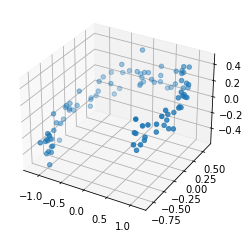

In [3]:
# use the function above to generate data points
X_train = generate_data(100)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

# preview the data
ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:, 0], X_train[:, 1], X_train[:, 2], cmap='Reds');

In [4]:
encoder = keras.models.Sequential([keras.layers.Dense(4, input_shape=[3]),keras.layers.Dense(2)])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])

autoencoder = keras.models.Sequential([encoder, decoder])

In [9]:
autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.1))

In [10]:
history = autoencoder.fit(X_train, X_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 0s 1ms/step - loss: 0.1464
Epoch 2/200
4/4 [==============================] - 0s 997us/step - loss: 0.0552
Epoch 3/200
4/4 [==============================] - 0s 997us/step - loss: 0.0374
Epoch 4/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0333
Epoch 5/200
4/4 [==============================] - 0s 998us/step - loss: 0.0305
Epoch 6/200
4/4 [==============================] - 0s 997us/step - loss: 0.0272
Epoch 7/200
4/4 [==============================] - 0s 665us/step - loss: 0.0247
Epoch 8/200
4/4 [==============================] - 0s 998us/step - loss: 0.0222
Epoch 9/200
4/4 [==============================] - 0s 998us/step - loss: 0.0203
Epoch 10/200
4/4 [==============================] - 0s 665us/step - loss: 0.0184
Epoch 11/200
4/4 [==============================] - 0s 997us/step - loss: 0.0168
Epoch 12/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0155
Epoch 13/200
4/4 [=========================

In [11]:
# encode the data
codings = encoder.predict(X_train)

# see a sample input-encoder output pair
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')

input point: [-0.9768543  -0.84950436 -0.30978614]
encoded point: [1.10626   0.6339045]


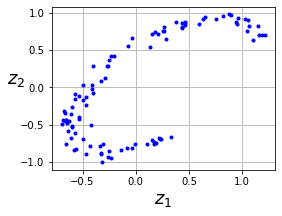

In [12]:
# plot all encoder outputs
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

In [13]:
# decode the encoder output
decodings = decoder.predict(codings)

# see a sample output for a single point
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')
print(f'decoded point: {decodings[0]}')

input point: [-0.9768543  -0.84950436 -0.30978614]
encoded point: [1.10626   0.6339045]
decoded point: [-0.9672164  -0.8337452  -0.37805772]


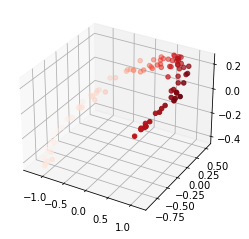

In [14]:
# plot the decoder output
ax = plt.axes(projection='3d')
ax.scatter3D(decodings[:, 0], decodings[:, 1], decodings[:, 2], c=decodings[:, 0], cmap='Reds');

### MNIST_Dataset

In [15]:
def map_image(image, label):
    '''Normalizes and flattens the image. Returns image as input and label.'''
    image = tf.cast(image, dtype=tf.float32)
    image = image / 255.0
    #image = tf.reshape(image, shape=(,))
    return image, image

In [18]:
# Load the train and test sets from TFDS

BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\ABC\tensorflow_datasets\mnist\3.0.1.incompleteFUKYKX\mnist-train.tfrecord*...:   0%|       …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\ABC\tensorflow_datasets\mnist\3.0.1.incompleteFUKYKX\mnist-test.tfrecord*...:   0%|        …

Dataset mnist downloaded and prepared to C:\Users\ABC\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


In [19]:
def simple_autoencoder(inputs):
    '''Builds the encoder and decoder using Dense layers.'''
    encoder = tf.keras.layers.Dense(units=32, activation='relu')(inputs)
    decoder = tf.keras.layers.Dense(units=784, activation='sigmoid')(encoder)

    return encoder, decoder

# set the input shape
inputs =  tf.keras.layers.Input(shape=(784,))

# get the encoder and decoder output
encoder_output, decoder_output = simple_autoencoder(inputs)

# setup the encoder because you will visualize its output later
encoder_model = tf.keras.Model(inputs=inputs, outputs=encoder_output)

# setup the autoencoder
autoencoder_model = tf.keras.Model(inputs=inputs, outputs=decoder_output)

In [20]:
autoencoder_model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss='binary_crossentropy')

In [21]:
train_steps = 60000 // BATCH_SIZE
simple_auto_history = autoencoder_model.fit(train_dataset, steps_per_epoch=train_steps, epochs=50)

Epoch 1/50
468/468 [==============================] - 2s 4ms/step - loss: 0.2274
Epoch 2/50
468/468 [==============================] - 1s 2ms/step - loss: 0.1424
Epoch 3/50
468/468 [==============================] - 1s 2ms/step - loss: 0.1195
Epoch 4/50
468/468 [==============================] - 1s 3ms/step - loss: 0.1079
Epoch 5/50
468/468 [==============================] - 1s 3ms/step - loss: 0.1012
Epoch 6/50
468/468 [==============================] - 1s 2ms/step - loss: 0.0974
Epoch 7/50
468/468 [==============================] - 1s 2ms/step - loss: 0.0955
Epoch 8/50
468/468 [==============================] - 1s 2ms/step - loss: 0.0947
Epoch 9/50
468/468 [==============================] - 1s 3ms/step - loss: 0.0942
Epoch 10/50
468/468 [==============================] - 1s 2ms/step - loss: 0.0939
Epoch 11/50
468/468 [==============================] - 1s 2ms/step - loss: 0.0937
Epoch 12/50
468/468 [==============================] - 1s 2ms/step - loss: 0.0935
Epoch 13/50
468/468 [====

In [22]:
def display_one_row(disp_images, offset, shape=(28, 28)):
    '''Display sample outputs in one row.'''
    for idx, test_image in enumerate(disp_images):
        plt.subplot(3, 10, offset + idx + 1)
        plt.xticks([])
        plt.yticks([])
        test_image = np.reshape(test_image, shape)
        plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):
    '''Displays the input, encoded, and decoded output values.'''
    plt.figure(figsize=(15, 5))
    display_one_row(disp_input_images, 0, shape=(28,28,))
    display_one_row(disp_encoded, 10, shape=enc_shape)
    display_one_row(disp_predicted, 20, shape=(28,28,))

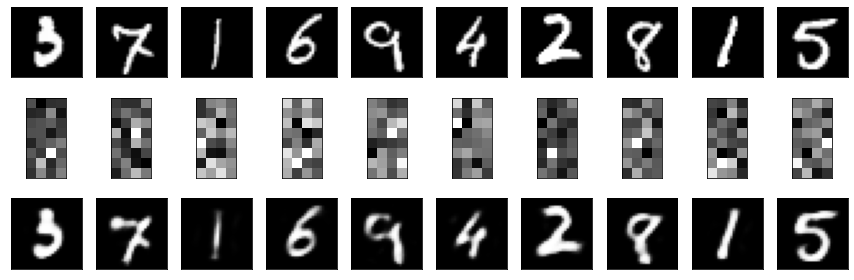

In [23]:
# take 1 batch of the dataset
test_dataset = test_dataset.take(1)

# take the input images and put them in a list
output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
      output_samples = input_image

# pick 10 random numbers to be used as indices to the list above
idxs = np.random.choice(BATCH_SIZE, size=10)

# get the encoder output
encoded_predicted = encoder_model.predict(test_dataset)

# get a prediction for the test batch
simple_predicted = autoencoder_model.predict(test_dataset)

# display the 10 samples, encodings and decoded values!
display_results(output_samples[idxs], encoded_predicted[idxs], simple_predicted[idxs])

# Convolutional Autoencoders

In [16]:
BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('fashion_mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('fashion_mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

In [17]:
def encoder(inputs):
    '''Defines the encoder with two Conv2D and max pooling layers.'''
    conv_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(inputs)
    max_pool_1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(max_pool_1)
    max_pool_2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv_2)
    return max_pool_2

In [18]:
def bottle_neck(inputs):
    '''Defines the bottleneck.'''
    bottle_neck = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same')(inputs)
    encoder_visualization = tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same')(bottle_neck)
    return bottle_neck, encoder_visualization

In [19]:
def decoder(inputs):
    '''Defines the decoder path to upsample back to the original image size.'''
    conv_1 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(inputs)
    up_sample_1 = tf.keras.layers.UpSampling2D(size=(2,2))(conv_1)

    conv_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(up_sample_1)
    up_sample_2 = tf.keras.layers.UpSampling2D(size=(2,2))(conv_2)

    conv_3 = tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same')(up_sample_2)

    return conv_3

In [20]:
def convolutional_auto_encoder():
    '''Builds the entire autoencoder model.'''
    inputs = tf.keras.layers.Input(shape=(28, 28, 1,))
    encoder_output = encoder(inputs)
    bottleneck_output, encoder_visualization = bottle_neck(encoder_output)
    decoder_output = decoder(bottleneck_output)
    model = tf.keras.Model(inputs =inputs, outputs=decoder_output)
    encoder_model = tf.keras.Model(inputs=inputs, outputs=encoder_visualization)
    return model, encoder_model

In [21]:
convolutional_model, convolutional_encoder_model = convolutional_auto_encoder()
convolutional_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 256)         2951

In [22]:
train_steps = 60000 // BATCH_SIZE
valid_steps = 60000 // BATCH_SIZE

convolutional_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')
conv_model_history = convolutional_model.fit(train_dataset, steps_per_epoch=train_steps, validation_data=test_dataset, validation_steps=valid_steps, epochs=40)

Epoch 1/40
468/468 [==============================] - 189s 403ms/step - loss: 0.2858 - val_loss: 0.2661
Epoch 2/40
369/468 [======================>.......] - ETA: 36s - loss: 0.2610

KeyboardInterrupt: 

In [ ]:
def display_one_row(disp_images, offset, shape=(28, 28)):
    '''Display sample outputs in one row.'''
    for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):
    '''Displays the input, encoded, and decoded output values.'''
    plt.figure(figsize=(15, 5))
    display_one_row(disp_input_images, 0, shape=(28,28,))
    display_one_row(disp_encoded, 10, shape=enc_shape)
    display_one_row(disp_predicted, 20, shape=(28,28,))

In [ ]:
# take 1 batch of the dataset
test_dataset = test_dataset.take(1)

# take the input images and put them in a list
output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
      output_samples = input_image

# pick 10 indices
idxs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# prepare test samples as a batch of 10 images
conv_output_samples = np.array(output_samples[idxs])
conv_output_samples = np.reshape(conv_output_samples, (10, 28, 28, 1))

# get the encoder ouput
encoded = convolutional_encoder_model.predict(conv_output_samples)

# get a prediction for some values in the dataset
predicted = convolutional_model.predict(conv_output_samples)

# display the samples, encodings and decoded values!
display_results(conv_output_samples, encoded, predicted, enc_shape=(7,7))